In [135]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np

In [149]:
df_spec = pd.read_csv('/Users/samtaimourzadeh/Downloads/specMapOutput_20180101.csv')
vins = df_spec.hashed_vin.unique()
df_spec;

In [69]:
df_test = df_spec[490:]
df_test = df_test.reset_index()
df_test

index  day  distance_driven               gpsdatetime  hashed_vin  \
0    490    1         0.021707  2018-01-01T14:55:55.000Z   167597942   
1    491    1         0.020811  2018-01-01T14:54:32.000Z   167597942   
2    492    1         0.021500  2018-01-01T14:56:51.000Z   167597942   
3    493    1         0.019450  2018-01-01T21:54:08.000Z   167597942   
4    494    1         0.009879  2018-01-01T14:51:46.000Z   167597942   
5    495    1         0.017686  2018-01-01T21:59:39.000Z   167597942   
6    496    1         0.023041  2018-01-01T15:14:10.000Z   167597942   
7    497    1         0.017314  2018-01-01T21:48:27.000Z   167597942   
8    498    1         0.022134  2018-01-01T15:13:57.000Z   167597942   

    latitude   longitude  month    ODO ROAD_CLASS  ...       SP1  SPEED  \
0  33.873952 -116.992830      1  923.0          S  ...   77.4912   65.0   
1  33.856971 -117.009360      1  921.0          S  ...   74.4154   65.0   
2  33.891372 -116.988611      1  924.0          S  ...   76.5094   65.0   
3  33.889525 -116.989451      1  943.0          S  ...   69.0281   65.0   
4  33.821671 -117.003650      1  919.0        NaN  ...   35.6853    NaN   
5  33.818225 -117.000566      1  949.0          D  ...   63.5414   25.0   
6  33.933800 -116.990423      1  928.0          M  ...   82.4186   70.0   
7  33.933027 -116.990738      1  940.0          C  ...   62.9511   50.0   
8  33.931526 -116.986150      1  928.0          M  ...   78.5724   70.0   

   SPEED_VERIFIED  Status             Status.Code  \
0             1.0     NaN                     NaN   
1             1.0     NaN                     NaN   
2             1.0     NaN                     NaN   
3             1.0     NaN                     NaN   
4             NaN       F  NoMatchingRecordsFound   
5             2.0     NaN                     NaN   
6             1.0     NaN                     NaN   
7             1.0     NaN                     NaN   
8             1.0     NaN                     NaN   

                           Status.Description          STREET timezoneoffset  \
0                                         NaN  Lamb Canyon Rd             -5   
1                                         NaN  Lamb Canyon Rd             -5   
2                                         NaN  Lamb Canyon Rd             -5   
3                                         NaN  Lamb Canyon Rd             -5   
4  FindNearest operation returned no records.             NaN             -5   
5                                         NaN   N Ramona Blvd             -5   
6                                         NaN          I-10 W             -5   
7                                         NaN             NaN             -5   
8                                         NaN          I-10 W             -5   

         tscsenttime  year  
0  20180101135635868  2018  
1  20180101135536456  2018  
2  20180101135733705  2018  
3  20180101205451550  2018  
4  20180101135235847  2018  
5  20180101205953926  2018  
6  20180101141429699  2018  
7  20180101204901699  2018  
8  20180101141429699  2018  

[9 rows x 21 columns]

In [44]:
# test multiple points

locs = []

for i in range(0, len(df_test['latitude'])):
    location = (df_test['latitude'][i], df_test['longitude'][i])
    locs.append(location)
locs


[(33.8739518, -116.99282990000002),
 (33.8569705, -117.0093598),
 (33.891371500000005, -116.9886111),
 (33.8895247, -116.989451),
 (33.821671, -117.00365020000001),
 (33.818224799999996, -117.00056640000001),
 (33.933799900000004, -116.99042320000001),
 (33.9330273, -116.9907378),
 (33.9315256, -116.98615020000001)]

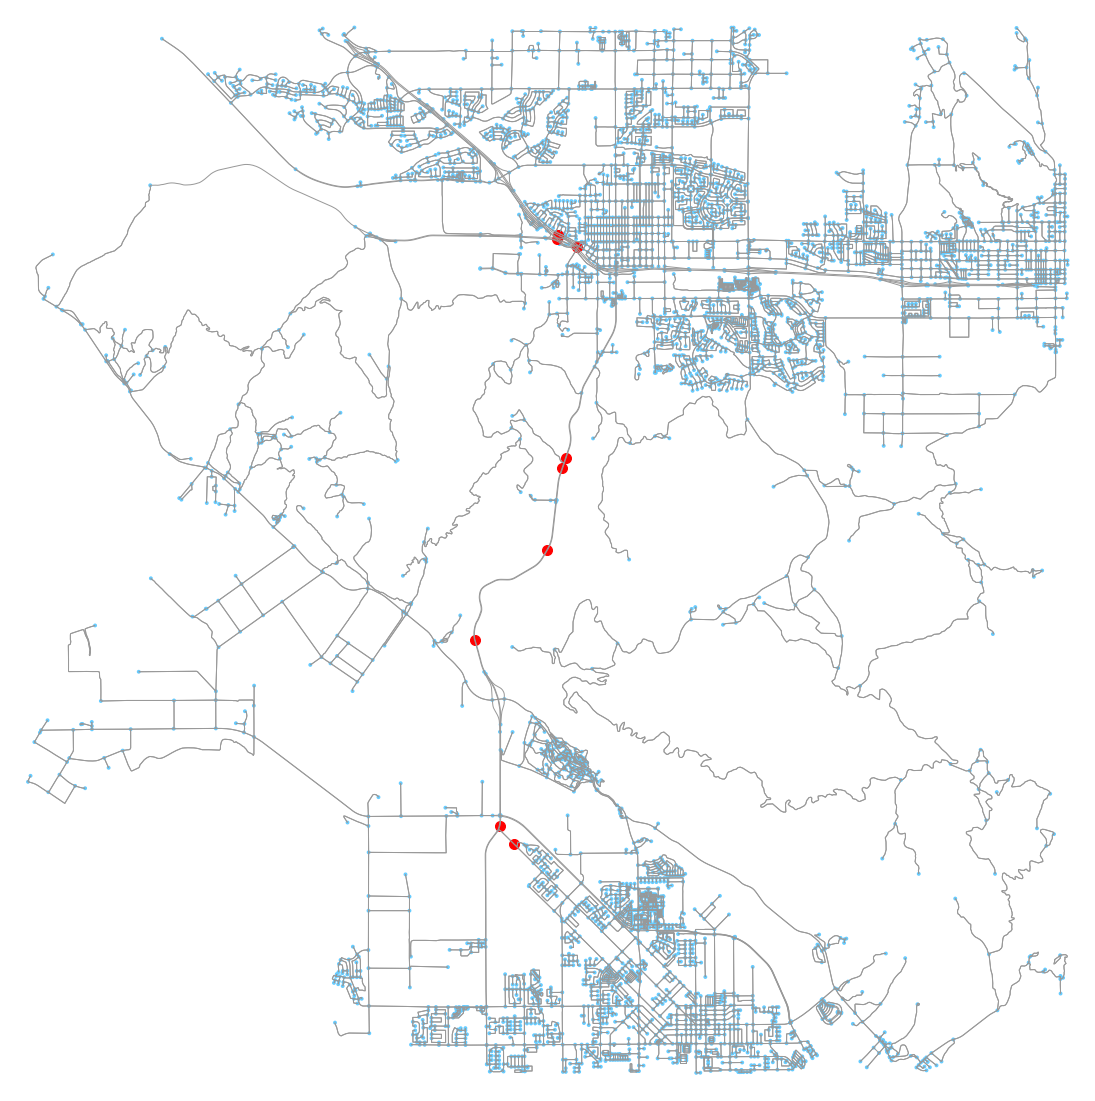

In [47]:
# Get graph data around input coordinate
graph = ox.graph_from_point(locs[0], distance=11000)
fig, ax = ox.plot_graph(graph, show=False, close=False, fig_height=20, fig_width=20)
for i in range(0,len(locs)):
    plt.scatter(locs[i][1],locs[i][0], c = 'r', s = 100)
plt.show()

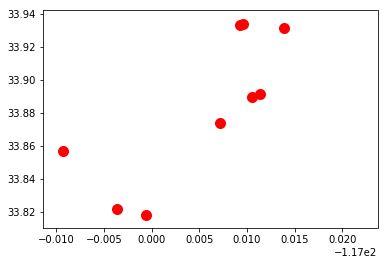

In [46]:
# Get graph data around input coordinate
#graph = ox.graph_from_point(locs[0], distance=8000)
#fig, ax = ox.plot_graph(graph, show=False, close=False, fig_height=20, fig_width=20)
for i in range(0,len(locs)):
    plt.scatter(locs[i][1],locs[i][0], c = 'r', s = 100)
plt.show()

In [48]:
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [49]:
edges.to_csv('/Users/samtaimourzadeh/Downloads/edges_specTest.csv')

In [50]:
edges.head()
edges.shape

(14597, 17)

In [51]:
edges = pd.read_csv('/Users/samtaimourzadeh/Downloads/edges_specTest.csv', low_memory=False)

In [52]:
edges.head()

Unnamed: 0 access bridge  \
0           0    NaN    NaN   
1           1    NaN    NaN   
2           2    NaN    NaN   
3           3    NaN    NaN   
4           4    NaN    NaN   

                                            geometry      highway junction  \
0  LINESTRING (-116.9660688 33.9334745, -116.9660...     tertiary      NaN   
1  LINESTRING (-116.9660688 33.9334745, -116.9660...     tertiary      NaN   
2  LINESTRING (-116.9660688 33.9334745, -116.9652...      service      NaN   
3  LINESTRING (-116.9652058 33.9339332, -116.9652...      service      NaN   
4  LINESTRING (-116.9658867 33.7816573, -116.9642...  residential      NaN   

   key lanes   length maxspeed                   name  oneway      osmid  ref  \
0    0   NaN   61.695      NaN    Pennsylvania Avenue   False  204993507  NaN   
1    0   NaN  109.132      NaN    Pennsylvania Avenue   False  204993507  NaN   
2    0   NaN  129.945      NaN                    NaN   False    7065740  NaN   
3    0   NaN  129.945      NaN                    NaN   False    7065740  NaN   
4    0   NaN  217.931      NaN  South Victoria Avenue   False    7282419  NaN   

  service tunnel         u         v  
0     NaN    NaN  54263815  54370053  
1     NaN    NaN  54263815  54493534  
2     NaN    NaN  54263815  54263818  
3     NaN    NaN  54263818  54263815  
4     NaN    NaN  54394893  54419089

In [53]:
edges['geometry'][0]

'LINESTRING (-116.9660688 33.9334745, -116.9660763 33.9340293)'

In [54]:
edges['geometry'][0][12:-1].split(",")

['-116.9660688 33.9334745', ' -116.9660763 33.9340293']

In [55]:
# number of edges
nedges = edges.geometry.size
nedges

14597

In [56]:
# get long / lat for edges
df = pd.DataFrame()
for i in range(0, nedges):
    edge_string = edges['geometry'][i][12:-1].split(",")
    tmp = []
    for j in range(0, len(edge_string)):
        edge_array = np.fromstring(edge_string[j], sep=' ')
        edge_array = np.flip(edge_array)
        tmp.append(edge_array)
        tmp2 = np.concatenate(tmp)
        dftmp = pd.DataFrame(tmp2)
    df = pd.concat([df, dftmp], axis=1, ignore_index=True)

In [57]:
index = np.zeros(len(locs))
for i in range(0,len(locs)):
    c = (abs(df[1::2] - locs[i][1]).reset_index(drop=True) + abs(df[0::2] - locs[i][0]).reset_index(drop=True)).min() 
    index[i] = c.idxmin()

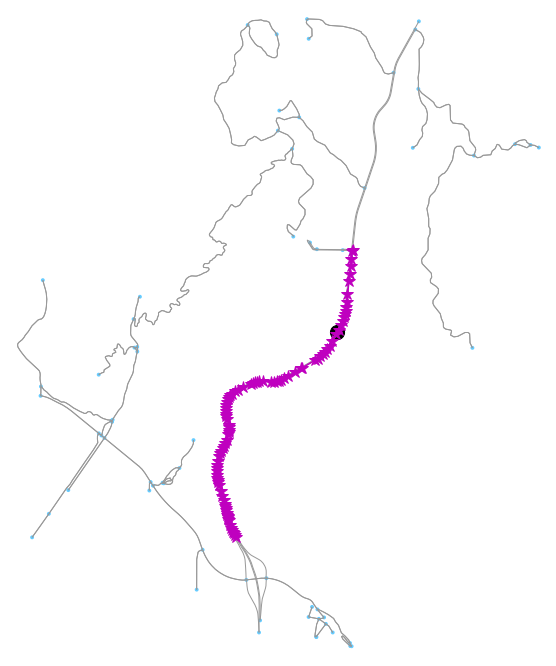

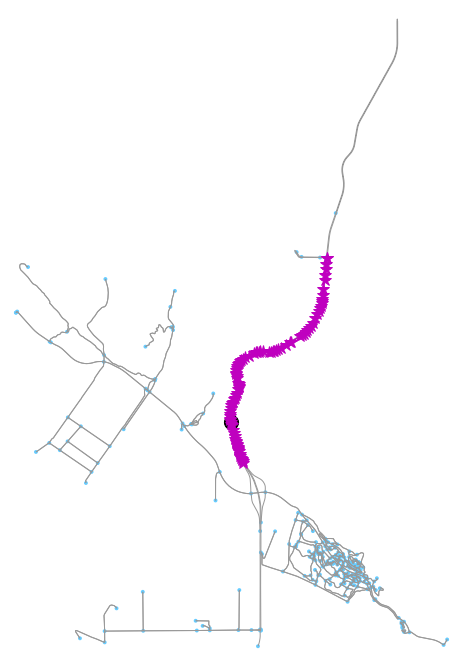

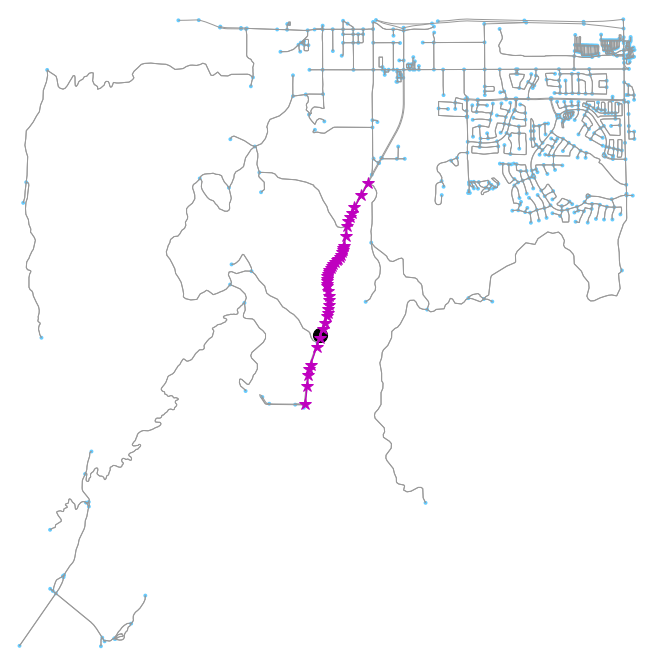

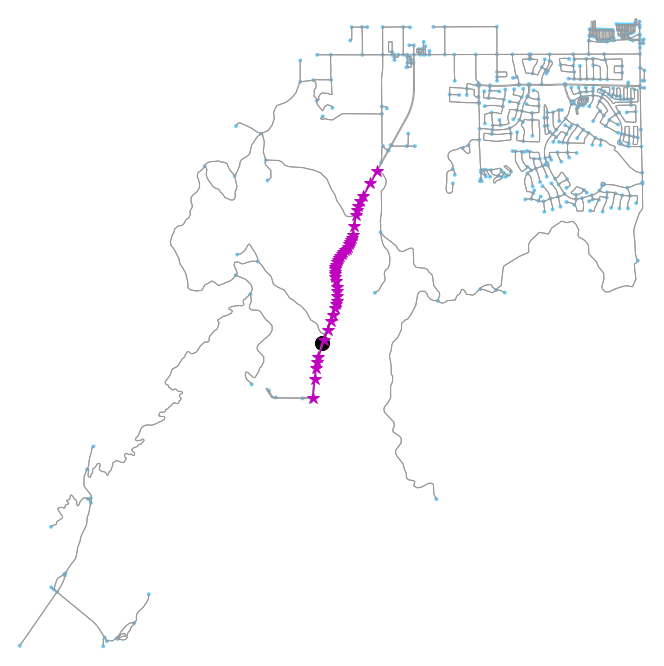

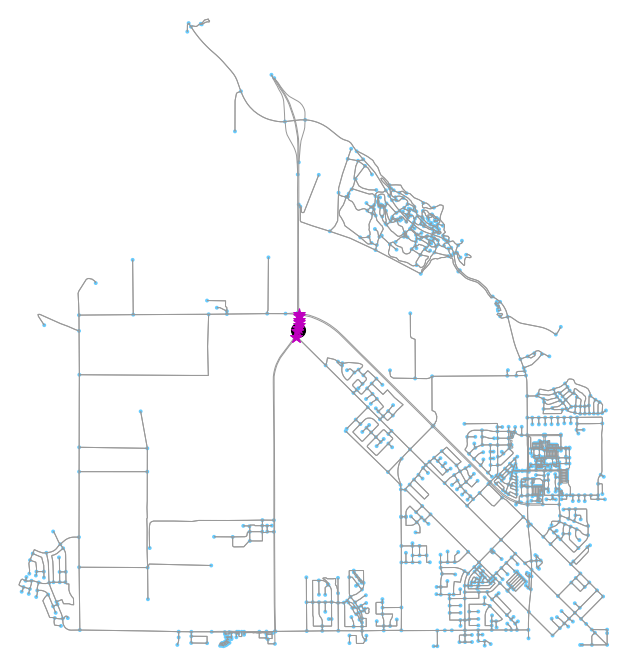

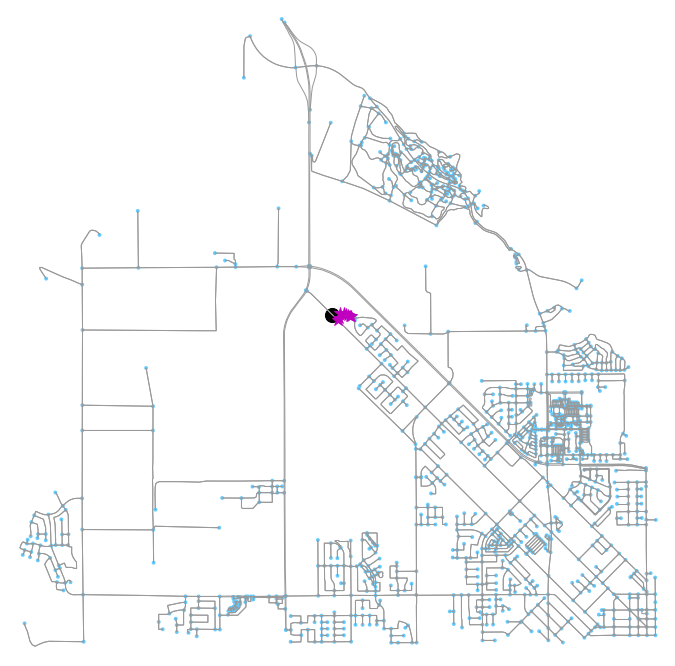

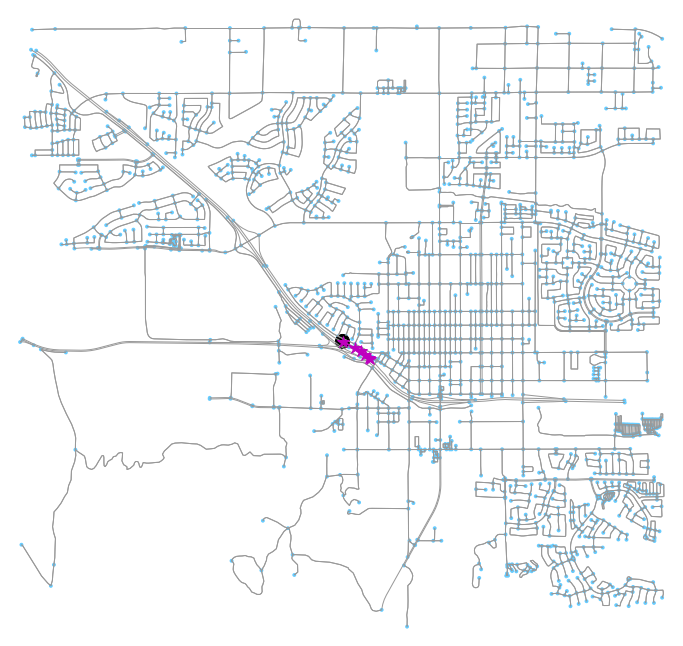

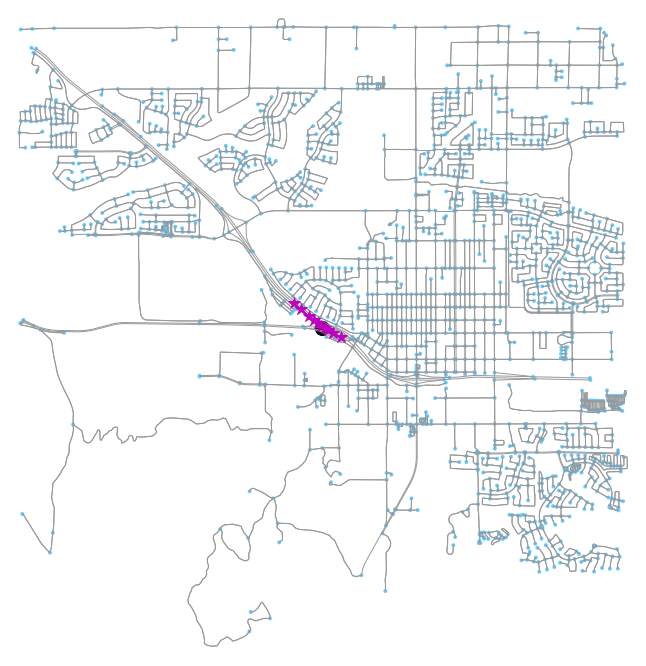

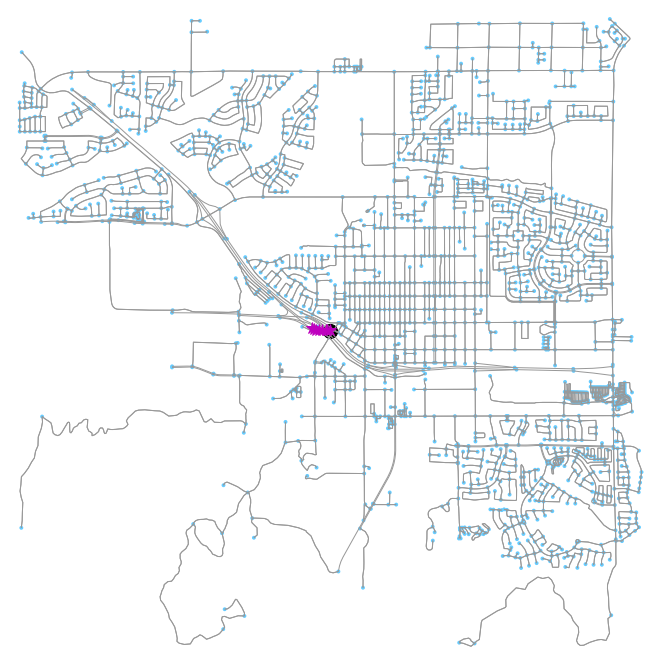

In [81]:
for i in range(0,len(locs)):

    tmp = np.array(df.iloc[:,int(index[i])].dropna())
    ytmp = tmp[::2]
    xtmp = tmp[1::2]

    # Get graph data around input coordinate
    graph = ox.graph_from_point(locs[i], distance=4000)
    fig, ax = ox.plot_graph(graph, show=False, close=False, fig_height=12, fig_width=12)
    plt.plot(xtmp,ytmp, '-*m', markersize=13)
    plt.scatter(locs[i][1],locs[i][0], c = 'k', s = 200)
    plt.show()

In [60]:
index

array([12308., 12308., 11280., 11280., 12464.,  3680.,  3416., 10402.,
        7464.])

In [85]:
df;

In [65]:
graph = ox.graph_from_point(locs[0], distance=2000)

In [63]:
locs[0]

(33.8739518, -116.99282990000002)

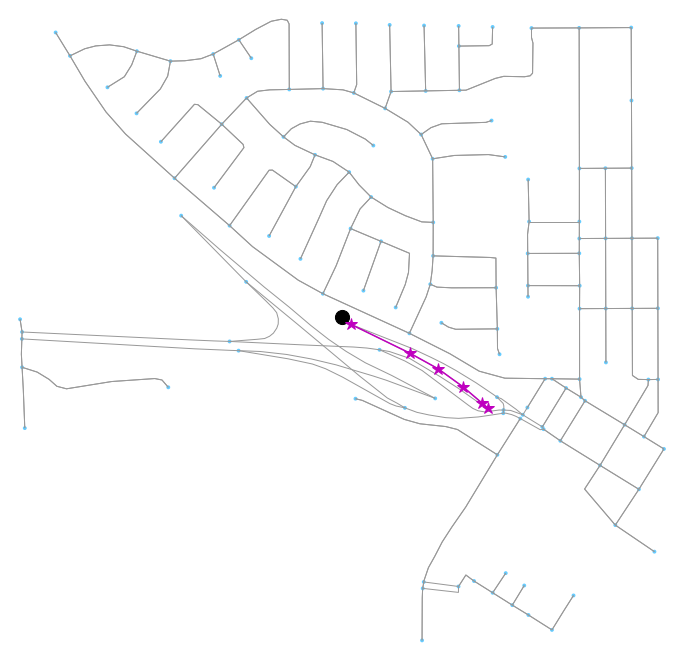

In [97]:
for i in range(6,7):#,len(locs)):

    tmp = np.array(df.iloc[:,int(index[i])].dropna())
    ytmp = tmp[::2]
    xtmp = tmp[1::2]

    # Get graph data around input coordinate
    graph = ox.graph_from_point(locs[i], distance=800)
    fig, ax = ox.plot_graph(graph, show=False, close=False, fig_height=12, fig_width=12)
    plt.plot(xtmp,ytmp, '-*m', markersize=13)
    plt.scatter(locs[i][1],locs[i][0], c = 'k', s = 200)
    plt.show()

In [83]:
edges.iloc[index,:]

Unnamed: 0 access bridge  \
12308       12308    NaN    NaN   
12308       12308    NaN    NaN   
11280       11280    NaN    NaN   
11280       11280    NaN    NaN   
12464       12464    NaN    NaN   
3680         3680    NaN    NaN   
3416         3416    NaN    yes   
10402       10402    NaN    NaN   
7464         7464    NaN    NaN   

                                                geometry        highway  \
12308  LINESTRING (-117.0069012 33.850469, -117.00705...          trunk   
12308  LINESTRING (-117.0069012 33.850469, -117.00705...          trunk   
11280  LINESTRING (-116.9907174 33.8834315, -116.9904...          trunk   
11280  LINESTRING (-116.9907174 33.8834315, -116.9904...          trunk   
12464  LINESTRING (-117.003928 33.820892, -117.003951...        primary   
3680   LINESTRING (-116.9998399 33.8176734, -116.9997...    residential   
3416   LINESTRING (-116.9865722 33.9318052, -116.9867...       motorway   
10402  LINESTRING (-116.9946774 33.9360241, -116.9936...       motorway   
7464   LINESTRING (-116.988764 33.9318096, -116.98844...  motorway_link   

      junction  key       lanes    length maxspeed              name  oneway  \
12308      NaN    0           2  4626.540   65 mph  Lamb Canyon Road    True   
12308      NaN    0           2  4626.540   65 mph  Lamb Canyon Road    True   
11280      NaN    0           2  2986.254      NaN  Lamb Canyon Road    True   
11280      NaN    0           2  2986.254      NaN  Lamb Canyon Road    True   
12464      NaN    0           2   295.299      NaN  Sanderson Avenue    True   
3680       NaN    0         NaN   241.099      NaN         Echo Road   False   
3416       NaN    0           3   392.558   70 mph               NaN    True   
10402      NaN    0           3   766.847   70 mph               NaN    True   
7464       NaN    0  ['2', '3']   243.728      NaN               NaN    True   

                                   osmid    ref service tunnel           u  \
12308                           69828982  CA 79     NaN    NaN    54637856   
12308                           69828982  CA 79     NaN    NaN    54637856   
11280                          111094300  CA 79     NaN    NaN    54194202   
11280                          111094300  CA 79     NaN    NaN    54194202   
12464                          179302333    NaN     NaN    NaN  2463233451   
3680                           221560055    NaN     NaN    NaN  2305888230   
3416              [123904356, 104819446]   I 10     NaN    NaN    54464144   
10402                           45071584   I 10     NaN    NaN   418343831   
7464   [173818712, 568414014, 568414015]    NaN     NaN    NaN    54189826   

                v  
12308  5226200814  
12308  5226200814  
11280   834971777  
11280   834971777  
12464    54591302  
3680   3940799430  
3416    418343841  
10402    54189819  
7464   1209018809

In [84]:
df_test

index  day  distance_driven               gpsdatetime  hashed_vin  \
0    490    1         0.021707  2018-01-01T14:55:55.000Z   167597942   
1    491    1         0.020811  2018-01-01T14:54:32.000Z   167597942   
2    492    1         0.021500  2018-01-01T14:56:51.000Z   167597942   
3    493    1         0.019450  2018-01-01T21:54:08.000Z   167597942   
4    494    1         0.009879  2018-01-01T14:51:46.000Z   167597942   
5    495    1         0.017686  2018-01-01T21:59:39.000Z   167597942   
6    496    1         0.023041  2018-01-01T15:14:10.000Z   167597942   
7    497    1         0.017314  2018-01-01T21:48:27.000Z   167597942   
8    498    1         0.022134  2018-01-01T15:13:57.000Z   167597942   

    latitude   longitude  month    ODO ROAD_CLASS  ...       SP1  SPEED  \
0  33.873952 -116.992830      1  923.0          S  ...   77.4912   65.0   
1  33.856971 -117.009360      1  921.0          S  ...   74.4154   65.0   
2  33.891372 -116.988611      1  924.0          S  ...   76.5094   65.0   
3  33.889525 -116.989451      1  943.0          S  ...   69.0281   65.0   
4  33.821671 -117.003650      1  919.0        NaN  ...   35.6853    NaN   
5  33.818225 -117.000566      1  949.0          D  ...   63.5414   25.0   
6  33.933800 -116.990423      1  928.0          M  ...   82.4186   70.0   
7  33.933027 -116.990738      1  940.0          C  ...   62.9511   50.0   
8  33.931526 -116.986150      1  928.0          M  ...   78.5724   70.0   

   SPEED_VERIFIED  Status             Status.Code  \
0             1.0     NaN                     NaN   
1             1.0     NaN                     NaN   
2             1.0     NaN                     NaN   
3             1.0     NaN                     NaN   
4             NaN       F  NoMatchingRecordsFound   
5             2.0     NaN                     NaN   
6             1.0     NaN                     NaN   
7             1.0     NaN                     NaN   
8             1.0     NaN                     NaN   

                           Status.Description          STREET timezoneoffset  \
0                                         NaN  Lamb Canyon Rd             -5   
1                                         NaN  Lamb Canyon Rd             -5   
2                                         NaN  Lamb Canyon Rd             -5   
3                                         NaN  Lamb Canyon Rd             -5   
4  FindNearest operation returned no records.             NaN             -5   
5                                         NaN   N Ramona Blvd             -5   
6                                         NaN          I-10 W             -5   
7                                         NaN             NaN             -5   
8                                         NaN          I-10 W             -5   

         tscsenttime  year  
0  20180101135635868  2018  
1  20180101135536456  2018  
2  20180101135733705  2018  
3  20180101205451550  2018  
4  20180101135235847  2018  
5  20180101205953926  2018  
6  20180101141429699  2018  
7  20180101204901699  2018  
8  20180101141429699  2018  

[9 rows x 21 columns]

In [101]:
locs[5]

(33.818224799999996, -117.00056640000001)

In [99]:
locs

[(33.8739518, -116.99282990000002),
 (33.8569705, -117.0093598),
 (33.891371500000005, -116.9886111),
 (33.8895247, -116.989451),
 (33.821671, -117.00365020000001),
 (33.818224799999996, -117.00056640000001),
 (33.933799900000004, -116.99042320000001),
 (33.9330273, -116.9907378),
 (33.9315256, -116.98615020000001)]

In [107]:
df_spec.shape

(499, 20)

In [111]:
# test 2

In [112]:
df_test = df_spec[df_spec['hashed_vin']==df_spec['hashed_vin'][0]]
df_test = df_test.reset_index()
df_test

index  day  distance_driven               gpsdatetime  hashed_vin  \
0       0    1         0.008871  2018-01-01T20:35:08.000Z -2002659218   
1       1    1         0.011691  2018-01-01T02:21:40.000Z -2002659218   
2       2    1         0.011039  2018-01-01T02:27:23.000Z -2002659218   
3       3    1         0.022067  2018-01-01T22:14:26.000Z -2002659218   
4       4    1         0.009818  2018-01-01T02:45:20.000Z -2002659218   
5       5    1         0.011034  2018-01-01T02:33:22.000Z -2002659218   
6       6    1         0.010192  2018-01-01T02:36:37.000Z -2002659218   
7       7    1         0.010793  2018-01-01T20:32:42.000Z -2002659218   
8       8    1         0.009203  2018-01-01T22:05:55.000Z -2002659218   
9       9    1         0.009807  2018-01-01T02:31:04.000Z -2002659218   
10     10    1         0.012382  2018-01-01T22:05:03.000Z -2002659218   
11     11    1         0.009031  2018-01-01T21:13:31.000Z -2002659218   
12     14    1         0.012817  2018-01-01T02:27:17.000Z -2002659218   
13     17    1         0.012483  2018-01-01T02:34:21.000Z -2002659218   

     latitude  longitude  month     ODO ROAD_CLASS  ...       SP1  SPEED  \
0   41.938114 -88.090623      1  4483.0          C  ...   30.7579   40.0   
1   42.031612 -88.079970      1  4470.0          C  ...   41.7686   20.0   
2   42.025575 -88.127491      1  4473.0          C  ...   39.9169   40.0   
3   41.990660 -88.023294      1  4494.0          M  ...   78.7836   55.0   
4   41.954091 -88.083800      1  4481.0          C  ...   34.9894   35.0   
5   42.026122 -88.110688      1  4474.0          C  ...   39.5689   40.0   
6   42.018403 -88.080076      1  4476.0          C  ...   35.4741   40.0   
7   41.946636 -88.080729      1  4482.0          C  ...   38.7984   40.0   
8   41.938177 -88.092357      1  4487.0          C  ...   30.5155   40.0   
9   42.025423 -88.127565      1  4473.0          C  ...   34.6725   40.0   
10  41.939050 -88.104922      1  4486.0          C  ...   44.1795   40.0   
11  41.937928 -88.106732      1  4485.0          R  ...   31.9820   30.0   
12  42.025632 -88.126074      1  4473.0          C  ...   46.3791   40.0   
13  42.026595 -88.097088      1  4475.0          C  ...   44.4964   40.0   

    SPEED_VERIFIED  Status Status.Code Status.Description             STREET  \
0              1.0     NaN         NaN                NaN    W Army Trail Rd   
1              1.0     NaN         NaN                NaN       N Roselle Rd   
2              1.0     NaN         NaN                NaN    W Schaumburg Rd   
3              1.0     NaN         NaN                NaN            I-290 W   
4              1.0     NaN         NaN                NaN        W Schick Rd   
5              1.0     NaN         NaN                NaN    W Schaumburg Rd   
6              1.0     NaN         NaN                NaN       S Roselle Rd   
7              1.0     NaN         NaN                NaN  S Bloomingdale Rd   
8              1.0     NaN         NaN                NaN    W Army Trail Rd   
9              1.0     NaN         NaN                NaN    W Schaumburg Rd   
10             1.0     NaN         NaN                NaN    W Army Trail Rd   
11             2.0     NaN         NaN                NaN                NaN   
12             1.0     NaN         NaN                NaN    W Schaumburg Rd   
13             1.0     NaN         NaN                NaN    W Schaumburg Rd   

   timezoneoffset        tscsenttime  year  
0              -6  20180101203521388  2018  
1              -6  20180101022209576  2018  
2              -6  20180101022809250  2018  
3              -6  20180101221457387  2018  
4              -6  20180101024601068  2018  
5              -6  20180101023401531  2018  
6              -6  20180101023701199  2018  
7              -6  20180101203321480  2018  
8              -6  20180101220628304  2018  
9              -6  20180101023201829  2018  
10             -6  20180101220628304  2018  
11             -6  2018010

In [115]:

locs = []

for i in range(0, len(df_test['latitude'])):
    location = (df_test['latitude'][i], df_test['longitude'][i])
    locs.append(location)
locs

[(41.9381141, -88.0906228),
 (42.0316124, -88.0799696),
 (42.0255751, -88.12749129999999),
 (41.9906597, -88.0232943),
 (41.9540907, -88.0837999),
 (42.026121999999994, -88.1106879),
 (42.0184028, -88.080076),
 (41.946636299999994, -88.08072920000001),
 (41.938177100000004, -88.09235679999999),
 (42.0254232, -88.1275651),
 (41.9390495, -88.10492190000001),
 (41.9379275, -88.10673179999999),
 (42.0256315, -88.1260742),
 (42.0265951, -88.0970877)]

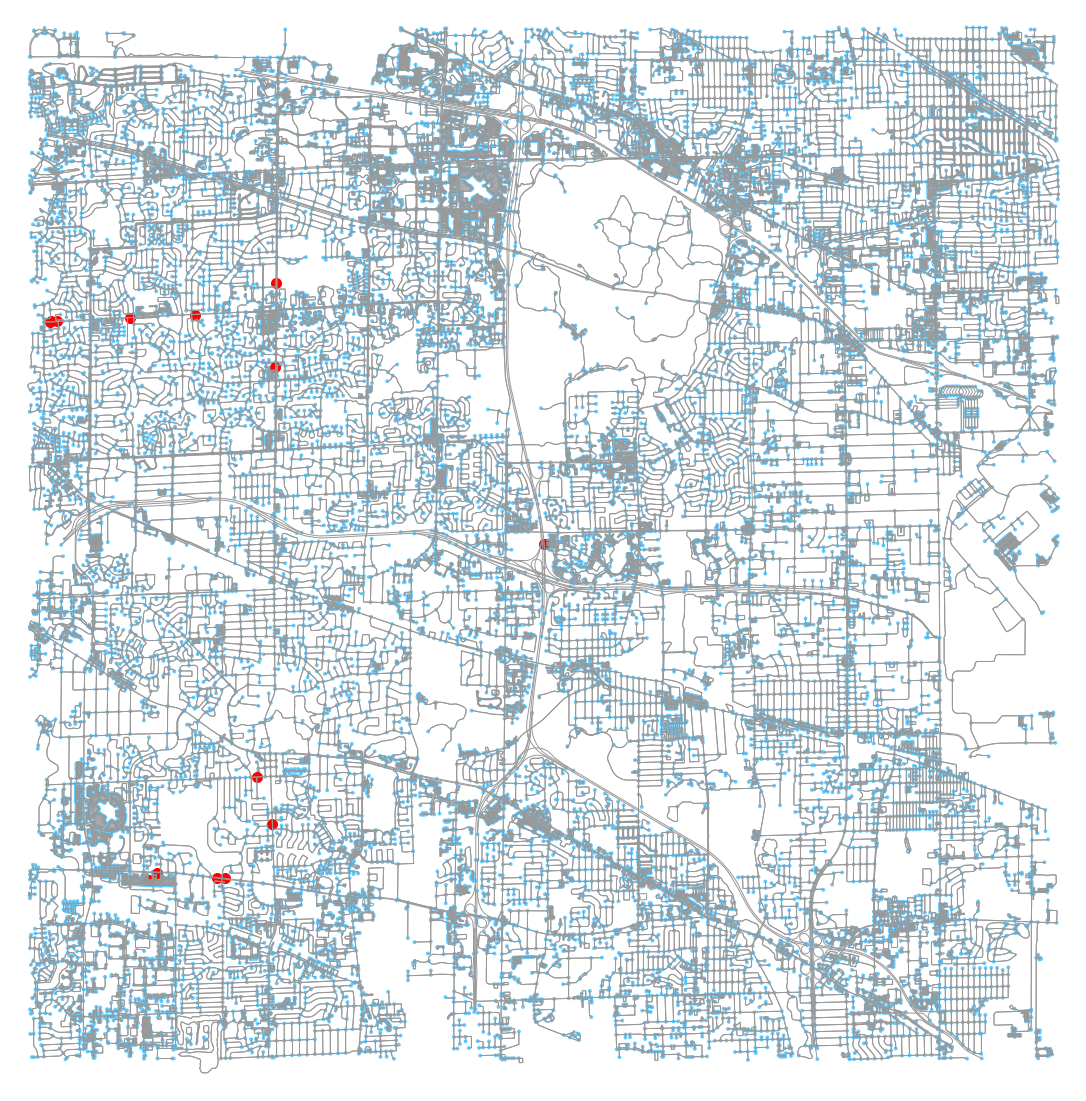

In [122]:
# Get graph data around input coordinate
graph = ox.graph_from_point(locs[3], distance=9000)
fig, ax = ox.plot_graph(graph, show=False, close=False, fig_height=20, fig_width=20)
for i in range(0,len(locs)):
    plt.scatter(locs[i][1],locs[i][0], c = 'r', s = 100)
plt.show()

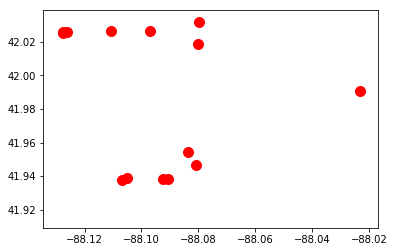

In [116]:
# Get graph data around input coordinate
#graph = ox.graph_from_point(locs[0], distance=8000)
#fig, ax = ox.plot_graph(graph, show=False, close=False, fig_height=20, fig_width=20)
for i in range(0,len(locs)):
    plt.scatter(locs[i][1],locs[i][0], c = 'r', s = 100)
plt.show()

In [123]:
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [124]:
edges.shape

(102413, 19)

In [136]:
df_spec.sort_values(by='hashed_vin').reset_index()
pd.nunique(df_spec['hashed_vin'])

AttributeError: module 'pandas' has no attribute 'nunique'

In [140]:
df_spec['hashed_vin'].nunique()

29

-2002659218

In [170]:
df_test = df_spec[df_spec['hashed_vin']==vins[4]]
df_test = df_test.reset_index()
df_test

index  day  distance_driven               gpsdatetime  hashed_vin  \
0     66    1         0.009820  2018-01-01T00:00:36.000Z -1545414074   
1     67    1         0.010635  2018-01-01T00:00:46.000Z -1545414074   
2     70    1         0.013185  2018-01-01T15:51:23.000Z -1545414074   
3     71    1         0.006741  2018-01-01T15:53:29.000Z -1545414074   
4     73    1         0.008748  2018-01-01T08:48:12.000Z -1545414074   
5     74    1         0.014126  2018-01-01T04:15:44.000Z -1545414074   
6     75    1         0.008758  2018-01-01T15:57:19.000Z -1545414074   
7     77    1         0.017083  2018-01-01T16:06:53.000Z -1545414074   
8     83    1         0.012629  2018-01-01T16:11:48.000Z -1545414074   

    latitude  longitude  month     ODO ROAD_CLASS  ...       SP1  SPEED  \
0  26.136039 -80.219421      1  3446.0          S  ...   35.0205   45.0   
1  26.135931 -80.221202      1  3446.0          S  ...   37.8539   45.0   
2  26.135734 -80.233891      1  3469.0          S  ...   46.6277   45.0   
3  26.135857 -80.216825      1  3470.0          S  ...   24.0098   45.0   
4  26.120961 -80.236873      1  3464.0          S  ...   28.3842   45.0   
5  26.121194 -80.188631      1  3455.0          S  ...   50.6790   40.0   
6  26.136356 -80.179805      1  3472.0          S  ...   31.1058   45.0   
7  26.226124 -80.136256      1  3480.0          M  ...   60.3600   65.0   
8  26.302109 -80.119954      1  3485.0          C  ...   45.0183   30.0   

   SPEED_VERIFIED  Status Status.Code Status.Description          STREET  \
0             1.0     NaN         NaN                NaN  W Sunrise Blvd   
1             1.0     NaN         NaN                NaN  W Sunrise Blvd   
2             1.0     NaN         NaN                NaN  W Sunrise Blvd   
3             1.0     NaN         NaN                NaN  W Sunrise Blvd   
4             1.0     NaN         NaN                NaN  W Broward Blvd   
5             1.0     NaN         NaN                NaN  W Broward Blvd   
6             1.0     NaN         NaN                NaN  W Sunrise Blvd   
7             1.0     NaN         NaN                NaN          I-95 N   
8             1.0     NaN         NaN                NaN             NaN   

  timezoneoffset        tscsenttime  year  
0             -5  20180101000115438  2018  
1             -5  20180101000115438  2018  
2             -5  20180101155215181  2018  
3             -5  20180101155415953  2018  
4             -5  20180101084834063  2018  
5             -5  20180101041602464  2018  
6             -5  20180101155815066  2018  
7             -5  20180101160715261  2018  
8             -5  20180101161213393  2018  

[9 rows x 21 columns]

In [171]:

locs = []

for i in range(0, len(df_test['latitude'])):
    location = (df_test['latitude'][i], df_test['longitude'][i])
    locs.append(location)
locs
locs[]

[(26.1360395, -80.21942059999999),
 (26.135931, -80.22120229999999),
 (26.1357335, -80.2338911),
 (26.1358572, -80.2168251),
 (26.1209614, -80.2368728),
 (26.1211936, -80.1886306),
 (26.1363563, -80.1798047),
 (26.226124100000003, -80.13625649999999),
 (26.3021094, -80.11995440000001)]

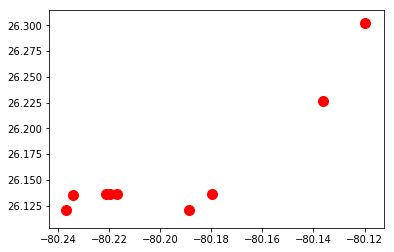

In [172]:
# Get graph data around input coordinate
#graph = ox.graph_from_point(locs[0], distance=8000)
#fig, ax = ox.plot_graph(graph, show=False, close=False, fig_height=20, fig_width=20)
for i in range(0,len(locs)):
    plt.scatter(locs[i][1],locs[i][0], c = 'r', s = 100)
plt.show()

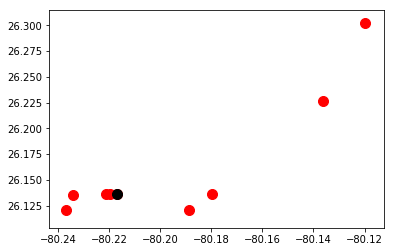

In [185]:
# Get graph data around input coordinate
#graph = ox.graph_from_point(locs[0], distance=8000)
#fig, ax = ox.plot_graph(graph, show=False, close=False, fig_height=20, fig_width=20)
for i in range(0,len(locs)):
    plt.scatter(locs[i][1],locs[i][0], c = 'r', s = 100)

i=3
plt.scatter(locs[i][1],locs[i][0], c = 'k', s = 100)
plt.show()

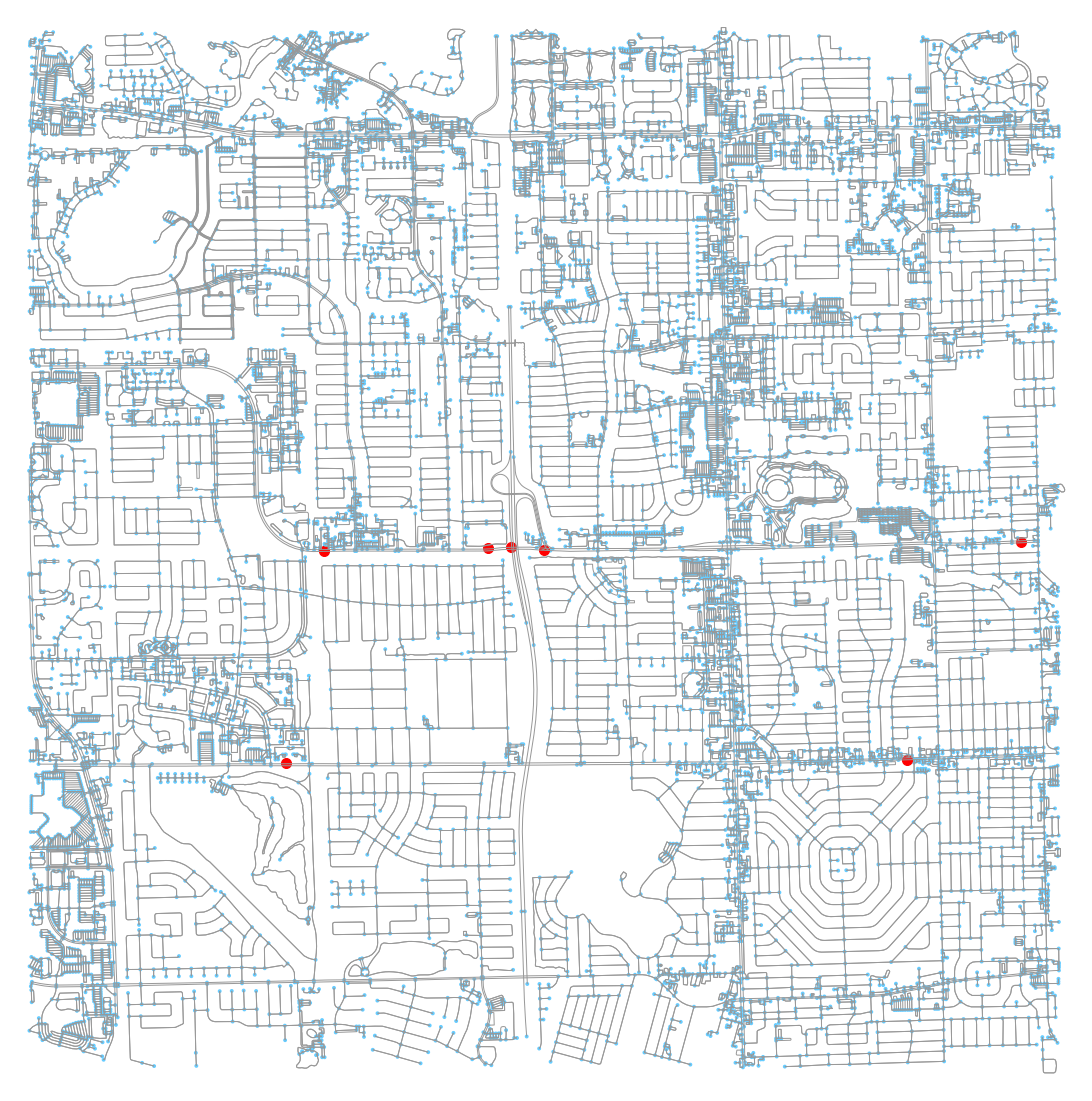

In [187]:
# Get graph data around input coordinate
graph = ox.graph_from_point(locs[3], distance=4000)
fig, ax = ox.plot_graph(graph, show=False, close=False, fig_height=20, fig_width=20)
for i in range(0,len(locs)-2):
    plt.scatter(locs[i][1],locs[i][0], c = 'r', s = 100)
plt.show()

In [188]:
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [192]:
edges.shape

(33363, 17)

In [190]:
nedges = edges['geometry'].size
nedges

33363

In [194]:
edges.to_csv('/Users/samtaimourzadeh/Downloads/edges_specTest.csv')
edges = pd.read_csv('/Users/samtaimourzadeh/Downloads/edges_specTest.csv', low_memory=False)

In [195]:
# get long / lat for edges
df = pd.DataFrame()
for i in range(0, nedges):
    edge_string = edges['geometry'][i][12:-1].split(",")
    tmp = []
    for j in range(0, len(edge_string)):
        edge_array = np.fromstring(edge_string[j], sep=' ')
        edge_array = np.flip(edge_array)
        tmp.append(edge_array)
        tmp2 = np.concatenate(tmp)
        dftmp = pd.DataFrame(tmp2)
    df = pd.concat([df, dftmp], axis=1, ignore_index=True)

In [196]:
df

0          1          2          3          4          5      \
0    26.120131  26.120131  26.120131  26.120278  26.171263  26.171263   
1   -80.204520 -80.204520 -80.204520 -80.204782 -80.181503 -80.181503   
2    26.120133  26.119937  26.120278  26.120278  26.171263  26.171530   
3   -80.203986 -80.204514 -80.204524 -80.204745 -80.181280 -80.181509   
4    26.120027  26.119947  26.120278        NaN        NaN        NaN   
5   -80.203875 -80.204186 -80.204745        NaN        NaN        NaN   
6          NaN  26.119862        NaN        NaN        NaN        NaN   
7          NaN -80.204115        NaN        NaN        NaN        NaN   
8          NaN  26.120027        NaN        NaN        NaN        NaN   
9          NaN -80.203875        NaN        NaN        NaN        NaN   
10         NaN        NaN        NaN        NaN        NaN        NaN   
11         NaN        NaN        NaN        NaN        NaN        NaN   
12         NaN        NaN        NaN        NaN        NaN        NaN   
13         NaN        NaN        NaN        NaN        NaN        NaN   
14         NaN        NaN        NaN        NaN        NaN        NaN   
15         NaN        NaN        NaN        NaN        NaN        NaN   
16         NaN        NaN        NaN        NaN        NaN        NaN   
17         NaN        NaN        NaN        NaN        NaN        NaN   
18         NaN        NaN        NaN        NaN        NaN        NaN   
19         NaN        NaN        NaN        NaN        NaN        NaN   
20         NaN        NaN        NaN        NaN        NaN        NaN   
21         NaN        NaN        NaN        NaN        NaN        NaN   
22         NaN        NaN        NaN        NaN        NaN        NaN   
23         NaN        NaN        NaN        NaN        NaN        NaN   
24         NaN        NaN        NaN        NaN        NaN        NaN   
25         NaN        NaN        NaN        NaN        NaN        NaN   
26         NaN        NaN        NaN        NaN        NaN        NaN   
27         NaN        NaN        NaN        NaN        NaN        NaN   
28         NaN        NaN        NaN        NaN        NaN        NaN   
29         NaN        NaN        NaN        NaN        NaN        NaN   
..         ...        ...        ...        ...        ...        ...   
118        NaN        NaN        NaN        NaN        NaN        NaN   
119        NaN        NaN        NaN        NaN        NaN        NaN   
120        NaN        NaN        NaN        NaN        NaN        NaN   
121        NaN        NaN        NaN        NaN        NaN        NaN   
122        NaN        NaN        NaN        NaN        NaN        NaN   
123        NaN        NaN        NaN        NaN        NaN        NaN   
124        NaN        NaN        NaN        NaN        NaN        NaN   
125        NaN        NaN        NaN        NaN        NaN        NaN   
126        NaN        NaN        NaN        NaN        NaN        NaN   
127        NaN        NaN        NaN        NaN        NaN        NaN   
128        NaN        NaN        NaN        NaN        NaN        NaN   
129        NaN        NaN        NaN        NaN        NaN        NaN   
130        NaN        NaN        NaN        NaN        NaN        NaN   
131        NaN        NaN        NaN        NaN        NaN        NaN   
132        NaN        NaN        NaN        NaN        NaN        NaN   
133        NaN        NaN        NaN        NaN        NaN        NaN   
134        NaN        NaN        NaN        NaN        NaN        NaN   
135        NaN        NaN        NaN        NaN        NaN        NaN   
136        NaN        NaN        NaN        NaN        NaN        NaN   
137        NaN        NaN        NaN        NaN        NaN        NaN   
138        NaN        NaN        NaN        NaN        NaN        NaN   
139        NaN        NaN        NaN        NaN        NaN        NaN   
140        NaN        NaN        NaN        NaN        NaN        N

In [197]:
index = np.zeros(len(locs))
for i in range(0,len(locs)):
    c = (abs(df[1::2] - locs[i][1]).reset_index(drop=True) + abs(df[0::2] - locs[i][0]).reset_index(drop=True)).min() 
    index[i] = c.idxmin()

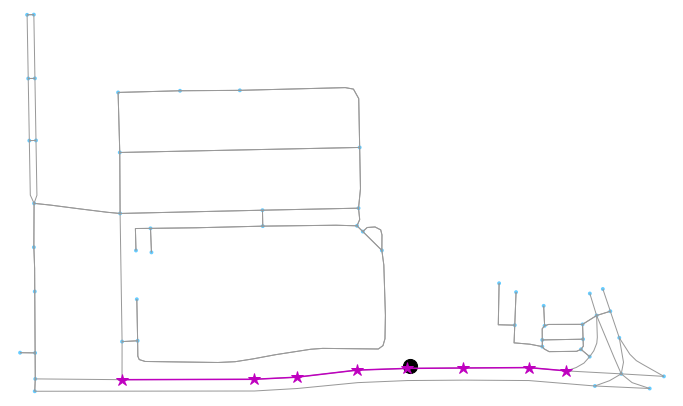

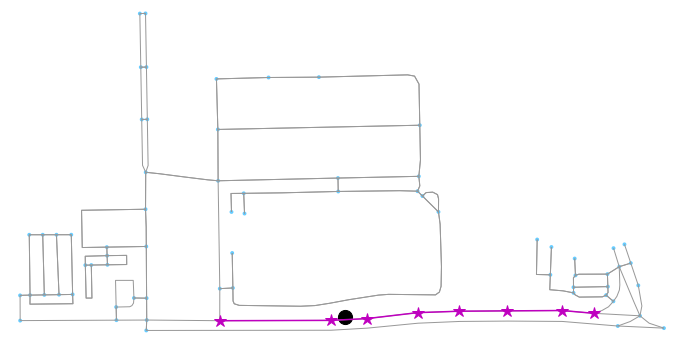

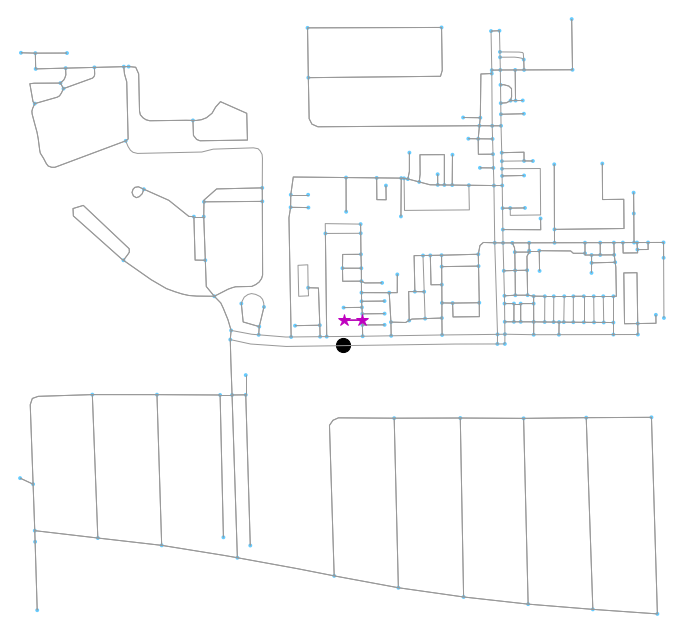

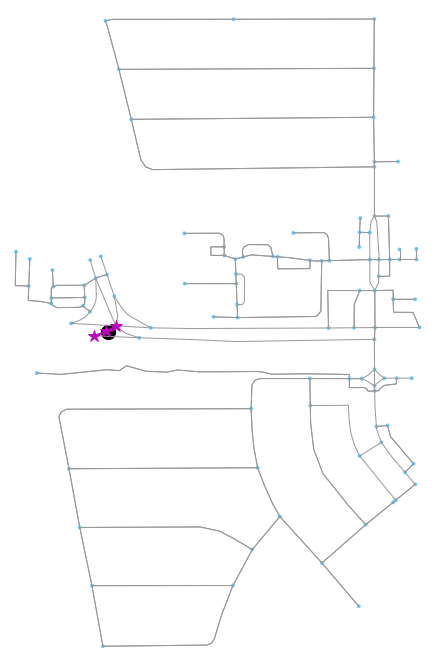

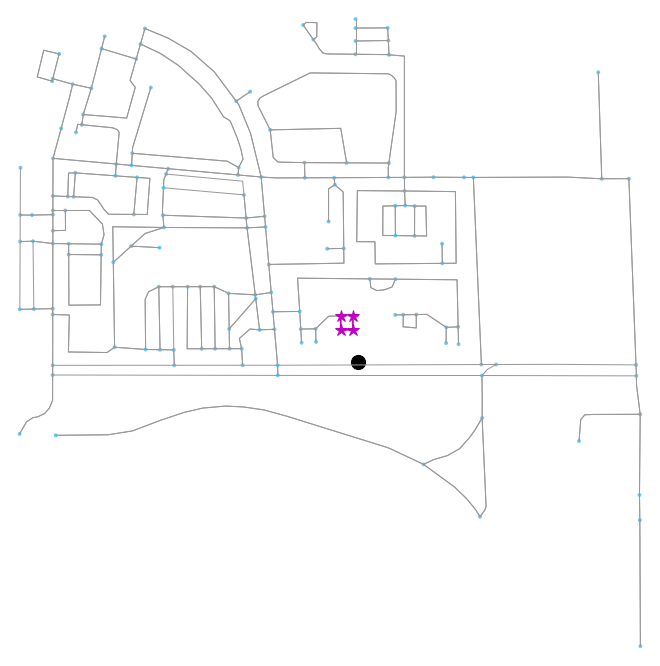

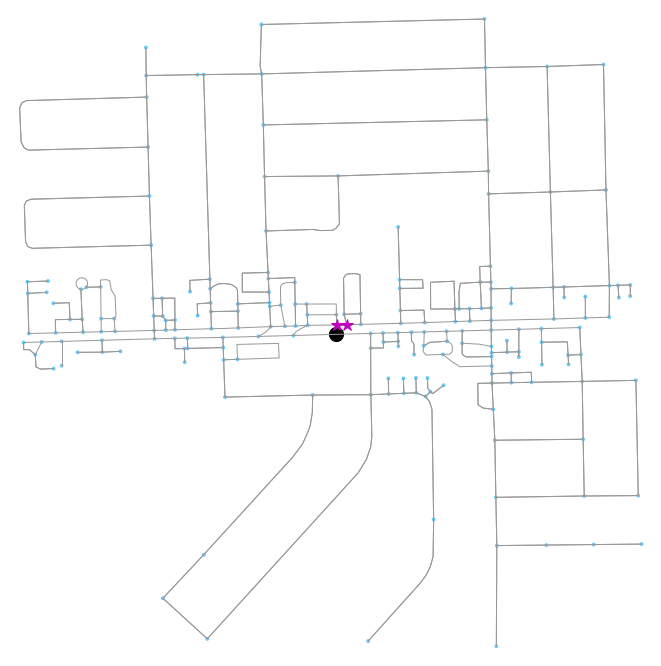

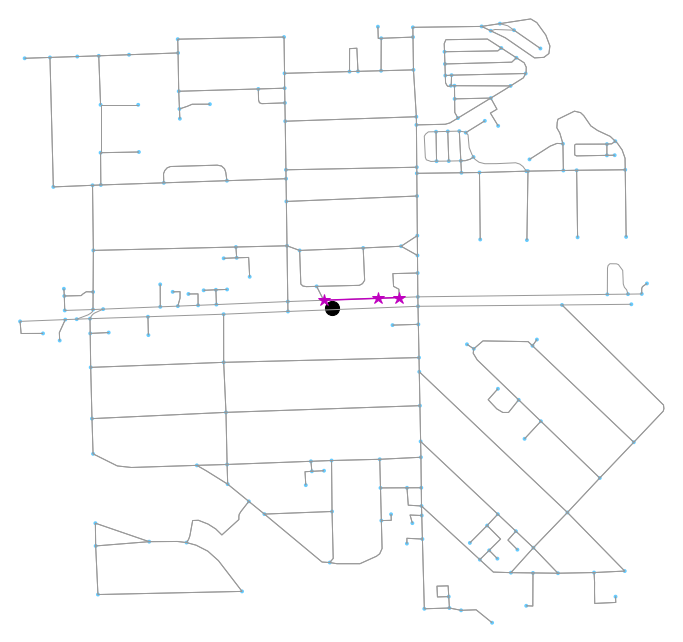

In [198]:
for i in range(0,len(locs)-2):

    tmp = np.array(df.iloc[:,int(index[i])].dropna())
    ytmp = tmp[::2]
    xtmp = tmp[1::2]

    # Get graph data around input coordinate
    graph = ox.graph_from_point(locs[i], distance=500)
    fig, ax = ox.plot_graph(graph, show=False, close=False, fig_height=12, fig_width=12)
    plt.plot(xtmp,ytmp, '-*m', markersize=13)
    plt.scatter(locs[i][1],locs[i][0], c = 'k', s = 200)
    plt.show()

In [209]:
edges.iloc[index[:-2],:].reset_index()

index  Unnamed: 0 access bridge  \
0   2279        2279    NaN    yes   
1   2279        2279    NaN    yes   
2  18076       18076    NaN    NaN   
3   2245        2245    NaN    NaN   
4  22171       22171    NaN    NaN   
5  26060       26060    NaN    NaN   
6  13619       13619    NaN    NaN   

                                            geometry        highway junction  \
0  LINESTRING (-80.2174102 26.1359855, -80.217893...        primary      NaN   
1  LINESTRING (-80.2174102 26.1359855, -80.217893...        primary      NaN   
2  LINESTRING (-80.23359689999999 26.1360797, -80...        service      NaN   
3  LINESTRING (-80.2170454 26.1358119, -80.216856...  motorway_link      NaN   
4  LINESTRING (-80.23695240000001 26.1215649, -80...        service      NaN   
5  LINESTRING (-80.18846859999999 26.1213299, -80...        primary      NaN   
6  LINESTRING (-80.178747 26.1364995, -80.1790817...        primary      NaN   

   key lanes   length maxspeed                    name  oneway  \
0    0     3  569.664   45 mph  West Sunrise Boulevard    True   
1    0     3  569.664   45 mph  West Sunrise Boulevard    True   
2    0   NaN   28.571      NaN                     NaN   False   
3    0     2   37.291      NaN                     NaN    True   
4    1   NaN   59.163      NaN                     NaN   False   
5    0     3   15.689   40 mph  West Broward Boulevard    True   
6    0     3  118.410   45 mph  West Sunrise Boulevard    True   

                              osmid     ref        service           u  \
0  [535002297, 137682892, 46200709]  FL 838            NaN   589073565   
1  [535002297, 137682892, 46200709]  FL 838            NaN   589073565   
2                         316330935     NaN  parking_aisle  3224422916   
3                          37890969     NaN            NaN   444664881   
4                         572567399     NaN            NaN  5500590085   
5                         137682848  FL 842            NaN  5505345151   
6                         129123021  FL 838            NaN  5498191767   

            v  width  
0   589073771    NaN  
1   589073771    NaN  
2  3224422917    NaN  
3   589073562    NaN  
4  5500590088    NaN  
5  5505345163    NaN  
6  5498191772    NaN

In [206]:
df_test.iloc[:-2,:]

index  day  distance_driven               gpsdatetime  hashed_vin  \
0     66    1         0.009820  2018-01-01T00:00:36.000Z -1545414074   
1     67    1         0.010635  2018-01-01T00:00:46.000Z -1545414074   
2     70    1         0.013185  2018-01-01T15:51:23.000Z -1545414074   
3     71    1         0.006741  2018-01-01T15:53:29.000Z -1545414074   
4     73    1         0.008748  2018-01-01T08:48:12.000Z -1545414074   
5     74    1         0.014126  2018-01-01T04:15:44.000Z -1545414074   
6     75    1         0.008758  2018-01-01T15:57:19.000Z -1545414074   

    latitude  longitude  month     ODO ROAD_CLASS  ...       SP1  SPEED  \
0  26.136039 -80.219421      1  3446.0          S  ...   35.0205   45.0   
1  26.135931 -80.221202      1  3446.0          S  ...   37.8539   45.0   
2  26.135734 -80.233891      1  3469.0          S  ...   46.6277   45.0   
3  26.135857 -80.216825      1  3470.0          S  ...   24.0098   45.0   
4  26.120961 -80.236873      1  3464.0          S  ...   28.3842   45.0   
5  26.121194 -80.188631      1  3455.0          S  ...   50.6790   40.0   
6  26.136356 -80.179805      1  3472.0          S  ...   31.1058   45.0   

   SPEED_VERIFIED  Status Status.Code Status.Description          STREET  \
0             1.0     NaN         NaN                NaN  W Sunrise Blvd   
1             1.0     NaN         NaN                NaN  W Sunrise Blvd   
2             1.0     NaN         NaN                NaN  W Sunrise Blvd   
3             1.0     NaN         NaN                NaN  W Sunrise Blvd   
4             1.0     NaN         NaN                NaN  W Broward Blvd   
5             1.0     NaN         NaN                NaN  W Broward Blvd   
6             1.0     NaN         NaN                NaN  W Sunrise Blvd   

  timezoneoffset        tscsenttime  year  
0             -5  20180101000115438  2018  
1             -5  20180101000115438  2018  
2             -5  20180101155215181  2018  
3             -5  20180101155415953  2018  
4             -5  20180101084834063  2018  
5             -5  20180101041602464  2018  
6             -5  20180101155815066  2018  

[7 rows x 21 columns]

In [208]:
len(index)

9